***
# Model Deployment : Containerizing and Deploying Machine Learning API Endpoints on Open-Source Platforms

***
### [**John Pauline Pineda**](https://github.com/JohnPaulinePineda) <br> <br> *March 5, 2025*
***

* [**1. Table of Contents**](#TOC)
    * [1.1 Model Development](#1.1)
        * [1.1.1 Project Background](#1.1.1)
        * [1.1.2 Data Background](#1.1.1)
        * [1.1.3 Model Building](#1.1.2)
        * [1.1.4 Model Inference](#1.1.3)
    * [1.2 Application Programming Interface (API) Development](#1.2)
        * [1.2.1 API Building](#1.2.1)
        * [1.2.2 API Testing](#1.2.2)
    * [1.3 Application Containerization](#1.3)
        * [1.3.1 Docker File Creation](#1.3.1)
        * [1.3.2 Docker Image Building](#1.3.2)
        * [1.3.3 Docker Image Testing](#1.3.3)
    * [1.4 Application Programming Interface (API) Deployment](#1.4)
        * [1.4.1 API Container Hosting](#1.4.1)
    * [1.5 User Interface (UI) Development](#1.5)
        * [1.5.1 UI Building With API Calls](#1.5.1)
    * [1.6 Web Application Deployment](#1.6)
        * [1.6.1 UI Hosting](#1.6.1)
    * [1.7 Consolidated Findings](#1.7)
* [**2. Summary**](#Summary)   
* [**3. References**](#References)

***

# 1. Table of Contents <a class="anchor" id="TOC"></a>

## 1.1. Model Development <a class="anchor" id="1.1"></a>

### 1.1.1 Project Background <a class="anchor" id="1.1.1"></a>

This project implements the **Cox Proportional Hazards Regression**, **Cox Net Survival**, **Survival Tree**, **Random Survival Forest**, and **Gradient Boosted Survival** models as independent base learners using various helpful packages in <mark style="background-color: #CCECFF"><b>Python</b></mark> to estimate the survival probabilities of right-censored survival time and status responses. The resulting predictions derived from the candidate models were evaluated in terms of their discrimination power using the **Harrel's Concordance Index** metric. Penalties including **Ridge Regularization** and **Elastic Net Regularization** were evaluated to impose constraints on the model coefficient updates, as applicable. Additionally, survival probability functions were estimated for model risk-groups and sampled individual cases. 

* The complete model development process was consolidated in this [**Jupyter Notebook**](https://johnpaulinepineda.github.io/Portfolio_Project_55/).
* All associated datasets and code files were stored in this [**GitHub Project Repository**](https://github.com/JohnPaulinePineda/Portfolio_Project_55). 
* The final model was deployed as a prototype application with a web interface via [**Streamlit**](https://heart-failure-survival-probability-estimation.streamlit.app/).
  

### 1.1.2 Data Background <a class="anchor" id="1.1.2"></a>

1. The original dataset comprised rows representing observations and columns representing variables.
2. The target variables contain both numeric and dichotomous categorical data types:
    * <span style="color: #FF0000">DEATH_EVENT</span> (Categorical: 0, Censored | 1, Death)
    * <span style="color: #FF0000">TIME</span> (Numeric: Days)
3. The complete set of 11 predictor variables contain both numeric and categorical data types:   
    * <span style="color: #FF0000">AGE</span> (Numeric: Years)
    * <span style="color: #FF0000">ANAEMIA</span> (Categorical: 0, Absent | 1 Present)
    * <span style="color: #FF0000">CREATININE_PHOSPHOKINASE</span> (Numeric: Percent)
    * <span style="color: #FF0000">DIABETES</span> (Categorical: 0, Absent | 1 Present)
    * <span style="color: #FF0000">EJECTION_FRACTION</span> (Numeric: Percent)
    * <span style="color: #FF0000">HIGH_BLOOD_PRESSURE</span> (Categorical: 0, Absent | 1 Present)
    * <span style="color: #FF0000">PLATELETS</span> (Numeric: kiloplatelets/mL)
    * <span style="color: #FF0000">SERUM_CREATININE</span> (Numeric: mg/dL)
    * <span style="color: #FF0000">SERUM_SODIUM</span> (Numeric: mEq/L)
    * <span style="color: #FF0000">SEX</span> (Categorical: 0, Female | 1, Male)
    * <span style="color: #FF0000">SMOKING</span> (Categorical: 0, Absent | 1 Present)
4. Exploratory data analysis identified a subset of 6 predictor variables that was significantly associated with the target variables and subsequently used as the final model predictors:   
    * <span style="color: #FF0000">AGE</span> (Numeric: Years)
    * <span style="color: #FF0000">ANAEMIA</span> (Categorical: 0, Absent | 1 Present)
    * <span style="color: #FF0000">EJECTION_FRACTION</span> (Numeric: Percent)
    * <span style="color: #FF0000">HIGH_BLOOD_PRESSURE</span> (Categorical: 0, Absent | 1 Present)
    * <span style="color: #FF0000">SERUM_CREATININE</span> (Numeric: mg/dL)
    * <span style="color: #FF0000">SERUM_SODIUM</span> (Numeric: mEq/L)


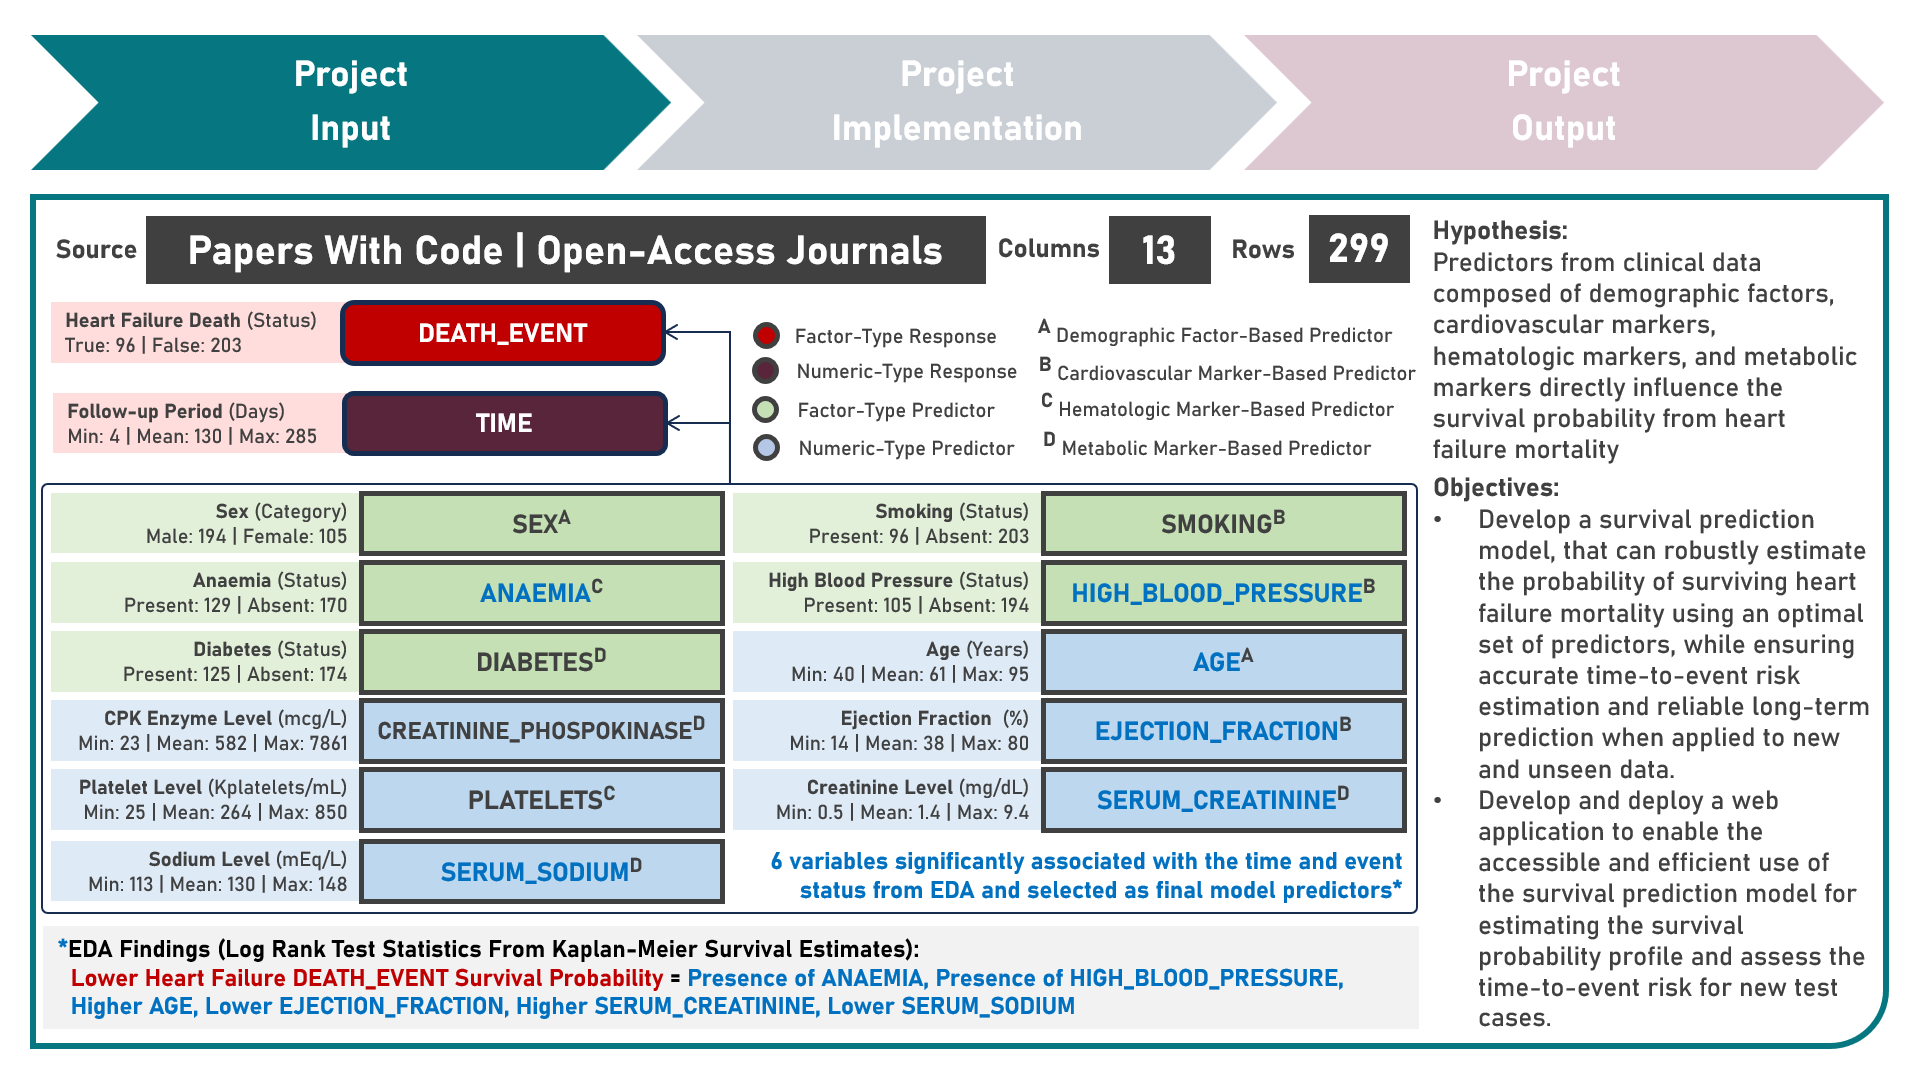

### 1.1.3 Model Building <a class="anchor" id="1.1.3"></a>

1. The model development process involved evaluating different **Model Structures**. Hyperparameter tuning was conducted using the 5-fold cross-validation method with optimal model performance determined using the **Harrel's concordance index**.
    * [Cox proportional hazards regression model](https://scikit-survival.readthedocs.io/en/stable/api/generated/sksurv.linear_model.CoxPHSurvivalAnalysis.html) developed from the original data.
    * [Cox net survival model ](https://scikit-survival.readthedocs.io/en/stable/api/generated/sksurv.linear_model.CoxnetSurvivalAnalysis.html) developed from the original data.
    * [Survival tree model](https://scikit-survival.readthedocs.io/en/stable/api/generated/sksurv.tree.SurvivalTree.html) developed from the original data.
    * [Random survival forest model,](https://scikit-survival.readthedocs.io/en/stable/api/generated/sksurv.ensemble.RandomSurvivalForest.html) developed from the original data.
    * [Gradient boosted survival model ](https://scikit-survival.readthedocs.io/en/stable/api/generated/sksurv.ensemble.GradientBoostingSurvivalAnalysis.html) developed from the original data.
2. The [cox proportional hazards regression model](https://scikit-survival.readthedocs.io/en/stable/api/generated/sksurv.linear_model.CoxPHSurvivalAnalysis.html) developed from the original data was selected as the final model by demonstrating the most stable **Harrel's concordance index** across the different internal and external validation sets. 
3. The final model configuration for the [cox proportional hazards regression model](https://scikit-survival.readthedocs.io/en/stable/api/generated/sksurv.linear_model.CoxPHSurvivalAnalysis.html) is described as follows:
    * <span style="color: #FF0000">alpha</span> = 10


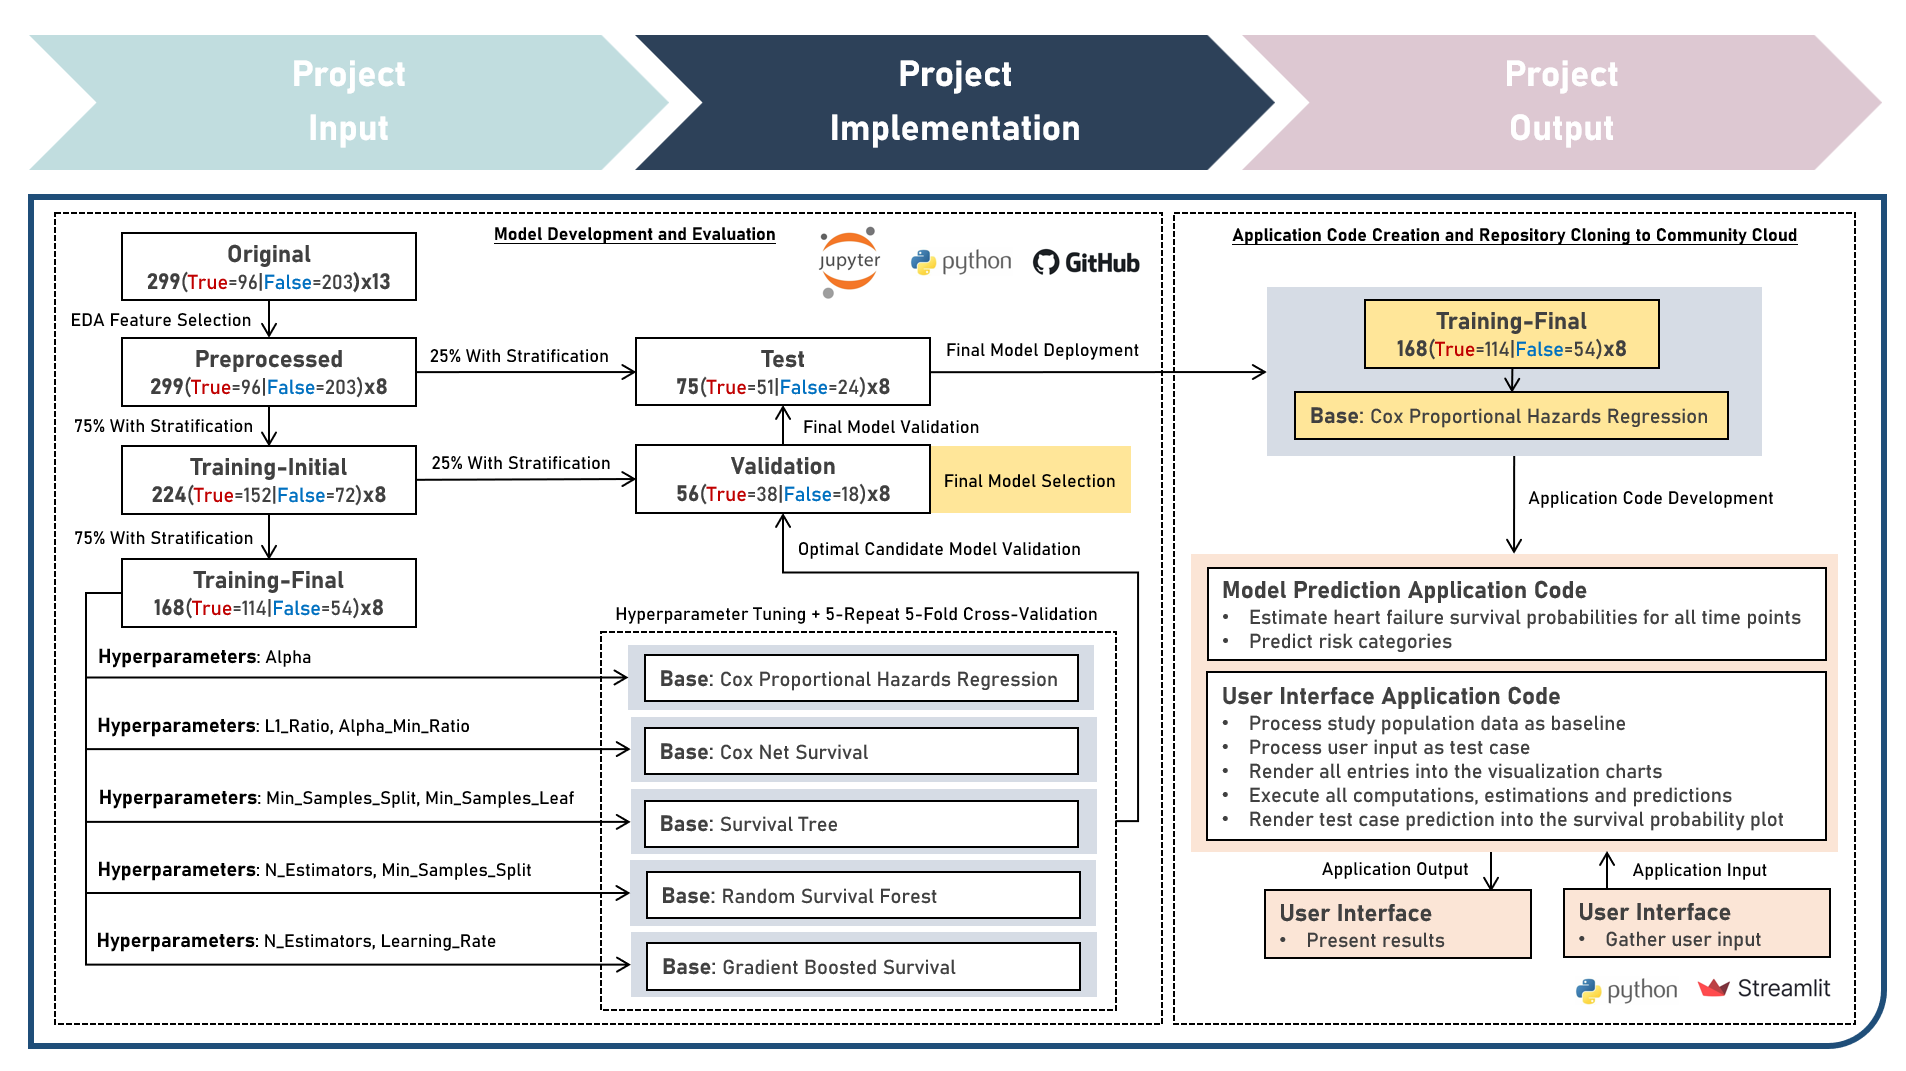

### 1.1.4 Model Inference <a class="anchor" id="1.1.4"></a>

1. The prediction model was deployed using a web application hosted at [<mark style="background-color: #CCECFF"><b>Streamlit</b></mark>](https://heart-failure-survival-probability-estimation.streamlit.app/).
2. The user interface input consists of the following:
    * range sliders to enable numerical input to measure the characteristics of the test case for certain cardiovascular, hematologic and metabolic markers:
        * <span style="color: #FF0000">AGE</span>
        * <span style="color: #FF0000">EJECTION_FRACTION</span>
        * <span style="color: #FF0000">SERUM_CREATININE</span>
        * <span style="color: #FF0000">SERUM_SODIUM</span>
    * radio buttons to enable binary category selection (Present | Absent) to identify the status of the test case for certain hematologic and cardiovascular markers:
        * <span style="color: #FF0000">ANAEMIA</span>
        * <span style="color: #FF0000">HIGH_BLOOD_PRESSURE</span>
    * action button to:
        * process study population data as baseline
        * process user input as test case
        * render all entries into visualization charts
        * execute all computations, estimations and predictions
        * render test case prediction into the survival probability plot
3. The user interface ouput consists of the following:
    * Kaplan-Meier plots to:
        * provide a baseline visualization of the survival profiles of the various feature categories (Yes | No or High | Low) estimated from the study population given the survival time and event status
        * Indicate the entries made from the user input to visually assess the survival probabilities of the test case characteristics against the study population across all time points
    * survival probability plot to:
        * provide a visualization of the baseline survival probability profile using each observation of the study population given the survival time and event status
        * indicate the heart failure survival probabilities of the test case at different time points
    * summary table to:
        * present the estimated heart failure survival probabilities and predicted risk category for the test case


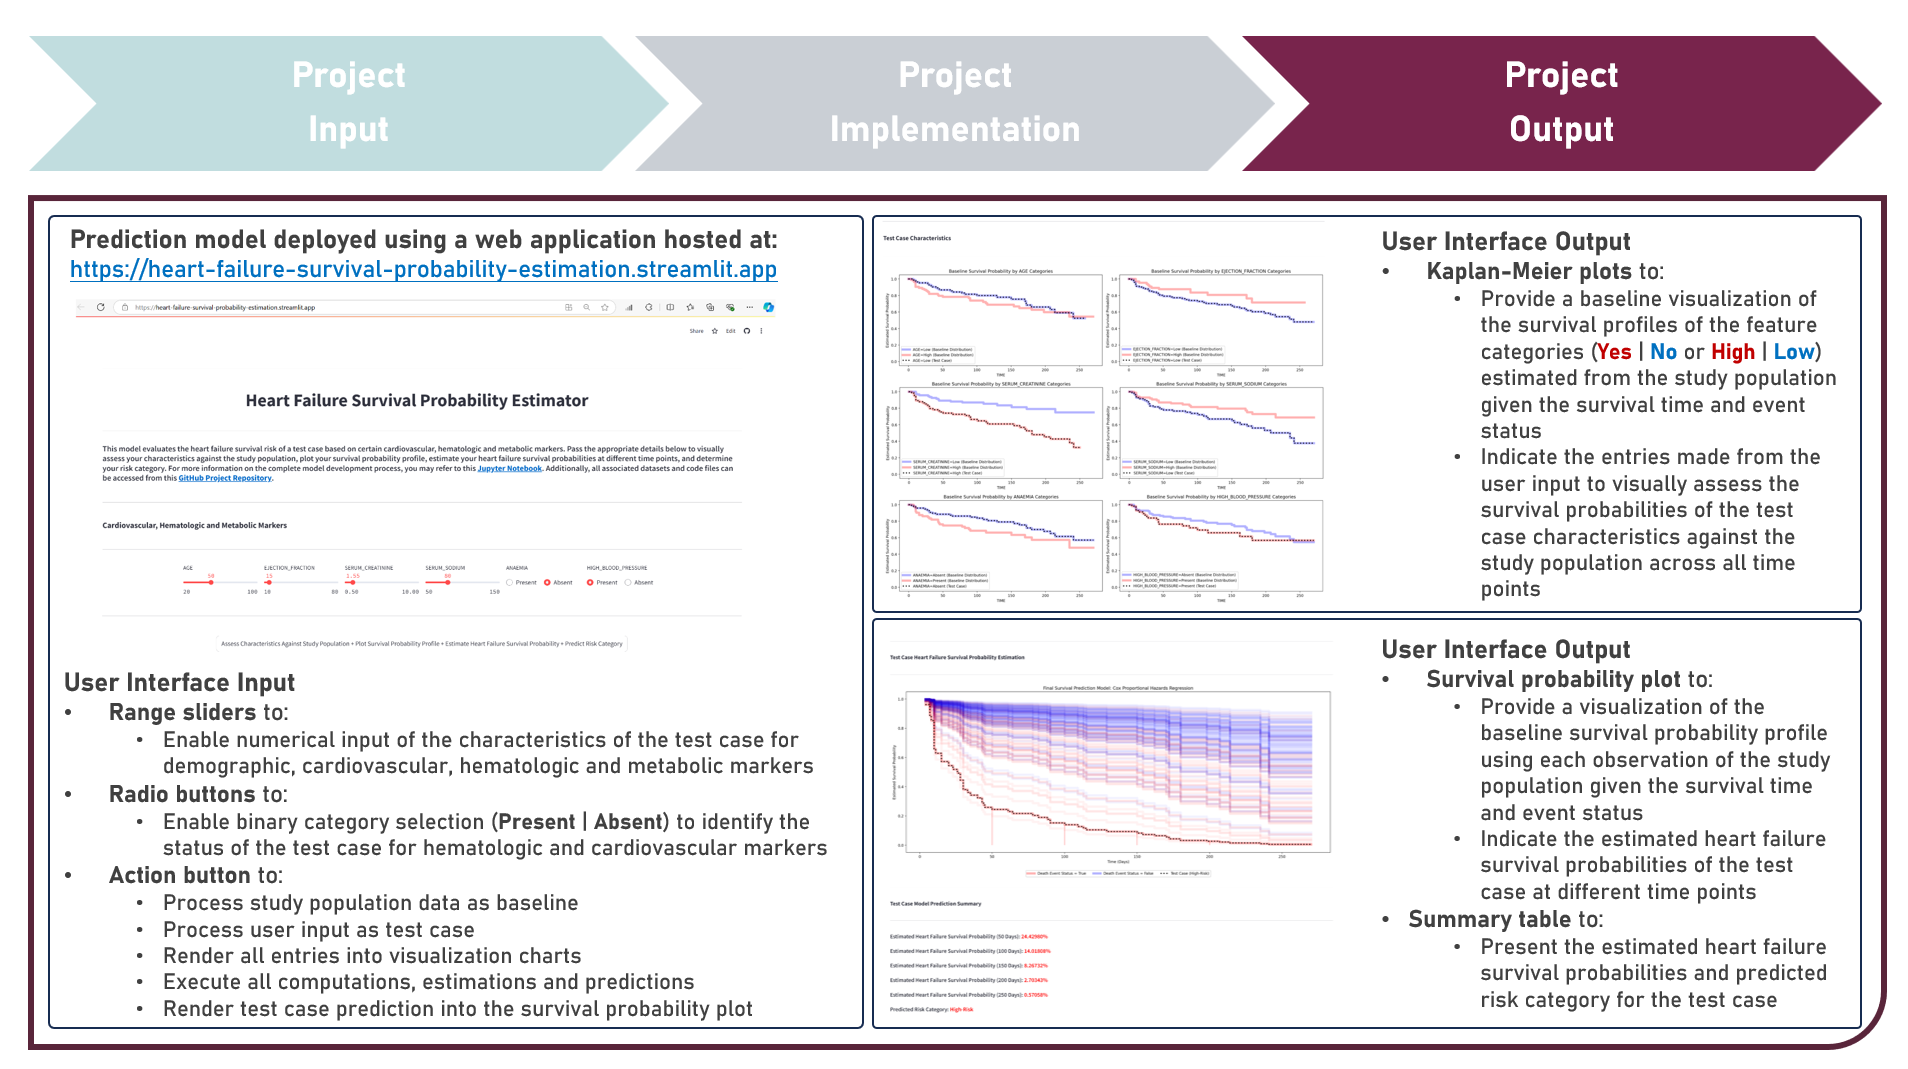

## 1.2. Application Programming Interface (API) Development <a class="anchor" id="1.2"></a>

### 1.2.1 API Building <a class="anchor" id="1.2.1"></a>

### 1.2.2 API Testing <a class="anchor" id="1.2.2"></a>

In [1]:
##################################
# Loading Python Libraries
##################################
import requests
import json
import pandas as pd
import base64
from IPython.display import display
from PIL import Image


In [2]:
##################################
# Defining the base URL of the API
# for the survival prediction model
##################################
SP_FASTAPI_BASE_URL = "http://127.0.0.1:8001"


In [3]:
##################################
# Defining the input values for an individual test case
# as a list
##################################
single_test_case = {
    "features_individual": [43, 0, 75, 1, 0.75, 100]  
}


In [4]:
##################################
# Defining the input values for a batch of cases
# as a list of lists
##################################
train_list = {
        "features_list": [
            [43, 0, 75, 1, 0.75, 100],
            [70, 1,	20,	1, 0.75, 100]
        ]
    }


In [5]:
##################################
# Defining the input values for a batch of cases for binning request
# as a list of dictionaries and a string
##################################
bin_request = {
        "X_original_list": [
            {"AGE": -0.10, "EJECTION_FRACTION": -0.10, "SERUM_CREATININE ": -0.10, "SERUM_SODIUM": -0.10},
            {"AGE": 0.20, "EJECTION_FRACTION": 0.20, "SERUM_CREATININE ": 0.20, "SERUM_SODIUM": 0.20},
            {"AGE": 0.90, "EJECTION_FRACTION": 0.90, "SERUM_CREATININE ": 0.90, "SERUM_SODIUM": 0.90}
        ],
        "numeric_feature": "AGE"
    }


In [6]:
##################################
# Defining the input values for a batch of cases for Kaplan-Meier plotting
# as a list of dictionaries and multiple strings
##################################
km_request = {
        "df": [
            {"TIME": 0, "DEATH_EVENT": 0, "AGE": "Low"},
            {"TIME": 25, "DEATH_EVENT": 0, "AGE": "Low"},
            {"TIME": 50, "DEATH_EVENT": 0, "AGE": "Low"},
            {"TIME": 100, "DEATH_EVENT": 0, "AGE": "Low"},
            {"TIME": 125, "DEATH_EVENT": 0, "AGE": "Low"},
            {"TIME": 150, "DEATH_EVENT": 0, "AGE": "Low"},
            {"TIME": 175, "DEATH_EVENT": 0, "AGE": "Low"},
            {"TIME": 200, "DEATH_EVENT": 0, "AGE": "Low"},
            {"TIME": 225, "DEATH_EVENT": 1, "AGE": "Low"},
            {"TIME": 250, "DEATH_EVENT": 1, "AGE": "Low"},
            {"TIME": 0, "DEATH_EVENT": 0, "AGE": "High"},
            {"TIME": 25, "DEATH_EVENT": 0, "AGE": "High"},
            {"TIME": 50, "DEATH_EVENT": 0, "AGE": "High"},
            {"TIME": 100, "DEATH_EVENT": 1, "AGE": "High"},
            {"TIME": 125, "DEATH_EVENT": 0, "AGE": "High"},
            {"TIME": 150, "DEATH_EVENT": 0, "AGE": "High"},
            {"TIME": 175, "DEATH_EVENT": 1, "AGE": "High"},
            {"TIME": 200, "DEATH_EVENT": 1, "AGE": "High"},
            {"TIME": 225, "DEATH_EVENT": 1, "AGE": "High"},
            {"TIME": 250, "DEATH_EVENT": 1, "AGE": "High"},
        ],
        "cat_var": "AGE",
        "new_case_value": "Low"
    }


In [7]:
##################################
# Defining the input values for an individual test case
# as a dictionary
##################################
test_case_request = {
    "AGE": 65,
    "EJECTION_FRACTION": 35,
    "SERUM_CREATININE": 1.2,
    "SERUM_SODIUM": 135,
    "ANAEMIA": 1,
    "HIGH_BLOOD_PRESSURE": 0
}


In [8]:
##################################
# Generating a GET endpoint request for
# for validating API service connection
##################################
response = requests.get(f"{SP_FASTAPI_BASE_URL}/")
if response.status_code == 200:
    display("Response:", response.json())
else:
    print("Error:", response.status_code, response.text)
    

'Response:'

{'message': 'Welcome to the Survival Prediction API!'}

In [9]:
##################################
# Sending a POST endpoint request for
# generating the heart failure survival profile,
# estimating the heart failure survival probabilities,
# and predicting the risk category
# of an individual test case
##################################
response = requests.post(f"{SP_FASTAPI_BASE_URL}/compute-individual-coxph-survival-probability-class/", json=single_test_case)
if response.status_code == 200:
    display("Response:", response.json())
else:
    print("Error:", response.status_code, response.text)
    

'Response:'

{'survival_function': [0.9973812917524568,
  0.9920416812438736,
  0.9893236791425079,
  0.972381113071464,
  0.9693179903073035,
  0.9631930672135339,
  0.9631930672135339,
  0.9600469571766689,
  0.9600469571766689,
  0.9568596864927983,
  0.9536305709158891,
  0.9471625843882805,
  0.93729581350105,
  0.9338986486591409,
  0.93048646553474,
  0.9270645831787163,
  0.9202445006124622,
  0.9167715111530355,
  0.9132845175345189,
  0.9097550958520674,
  0.9097550958520674,
  0.9097550958520674,
  0.9060810720432387,
  0.9024157452999795,
  0.9024157452999795,
  0.9024157452999795,
  0.9024157452999795,
  0.9024157452999795,
  0.8985598696587259,
  0.8985598696587259,
  0.8985598696587259,
  0.8945287485160898,
  0.8945287485160898,
  0.8945287485160898,
  0.8945287485160898,
  0.8901959645503091,
  0.8812352215018253,
  0.8812352215018253,
  0.8812352215018253,
  0.8812352215018253,
  0.8764677174183527,
  0.8764677174183527,
  0.8764677174183527,
  0.8764677174183527,
  0.870911365048

In [10]:
##################################
# Sending a POST endpoint request for
# generating the heart failure survival profile and
# estimating the heart failure survival probabilities
# of a list of train cases
##################################
response = requests.post(f"{SP_FASTAPI_BASE_URL}/compute-list-coxph-survival-profile/", json=train_list)
if response.status_code == 200:
    display("Response:", response.json())
else:
    print("Error:", response.status_code, response.text)
    

'Response:'

{'survival_profiles': [[0.9973812917524568,
   0.9920416812438736,
   0.9893236791425079,
   0.972381113071464,
   0.9693179903073035,
   0.9631930672135339,
   0.9631930672135339,
   0.9600469571766689,
   0.9600469571766689,
   0.9568596864927983,
   0.9536305709158891,
   0.9471625843882805,
   0.93729581350105,
   0.9338986486591409,
   0.93048646553474,
   0.9270645831787163,
   0.9202445006124622,
   0.9167715111530355,
   0.9132845175345189,
   0.9097550958520674,
   0.9097550958520674,
   0.9097550958520674,
   0.9060810720432387,
   0.9024157452999795,
   0.9024157452999795,
   0.9024157452999795,
   0.9024157452999795,
   0.9024157452999795,
   0.8985598696587259,
   0.8985598696587259,
   0.8985598696587259,
   0.8945287485160898,
   0.8945287485160898,
   0.8945287485160898,
   0.8945287485160898,
   0.8901959645503091,
   0.8812352215018253,
   0.8812352215018253,
   0.8812352215018253,
   0.8812352215018253,
   0.8764677174183526,
   0.8764677174183526,
   0.8764677174183

In [11]:
##################################
# Sending a POST endpoint request for
# creating dichotomous bins for the numeric features
# of a list of train cases
##################################
response = requests.post(f"{SP_FASTAPI_BASE_URL}/bin-numeric-model-feature/", json=bin_request)
if response.status_code == 200:
    display("Response:", pd.DataFrame(response.json()))
else:
    print("Error:", response.status_code, response.text)
    

'Response:'

,AGE,EJECTION_FRACTION,SERUM_CREATININE,SERUM_SODIUM
0,Low,-0.1,-0.1,-0.1
1,High,0.2,0.2,0.2
2,High,0.9,0.9,0.9


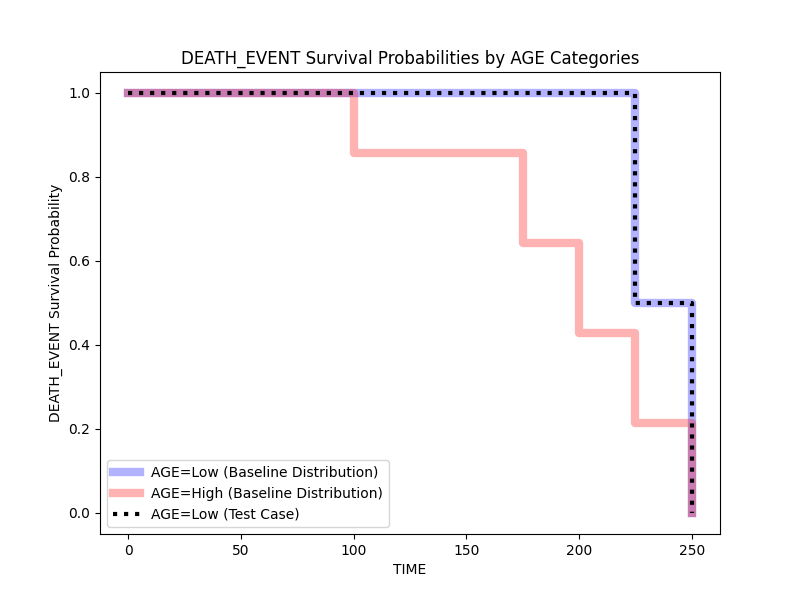

In [12]:
##################################
# Sending a POST endpoint request for
# plotting the estimated survival profiles
# using Kaplan-Meier Plots
##################################
response = requests.post(f"{SP_FASTAPI_BASE_URL}/plot-kaplan-meier/", json=km_request)
if response.status_code == 200:
    plot_data = response.json()["plot"]
    # Decoding and displaying the plot
    img = base64.b64decode(plot_data)
    with open("kaplan_meier_plot.png", "wb") as f:
        f.write(img)
        display(Image.open("kaplan_meier_plot.png"))
else:
    print("Error:", response.status_code, response.text)
    

In [13]:
##################################
# Sending a POST endpoint request for
# preprocessing an individual test case
##################################
response = requests.post(f"{SP_FASTAPI_BASE_URL}/preprocess-test-case/", json=test_case_request)
if response.status_code == 200:
    display("Response:", response.json())
else:
    print("Error:", response.status_code, response.text)
    

'Response:'

[{'AGE': 'High',
  'EJECTION_FRACTION': 'Low',
  'SERUM_CREATININE': 'High',
  'SERUM_SODIUM': 'Low',
  'ANAEMIA': 'Present',
  'HIGH_BLOOD_PRESSURE': 'Absent'}]

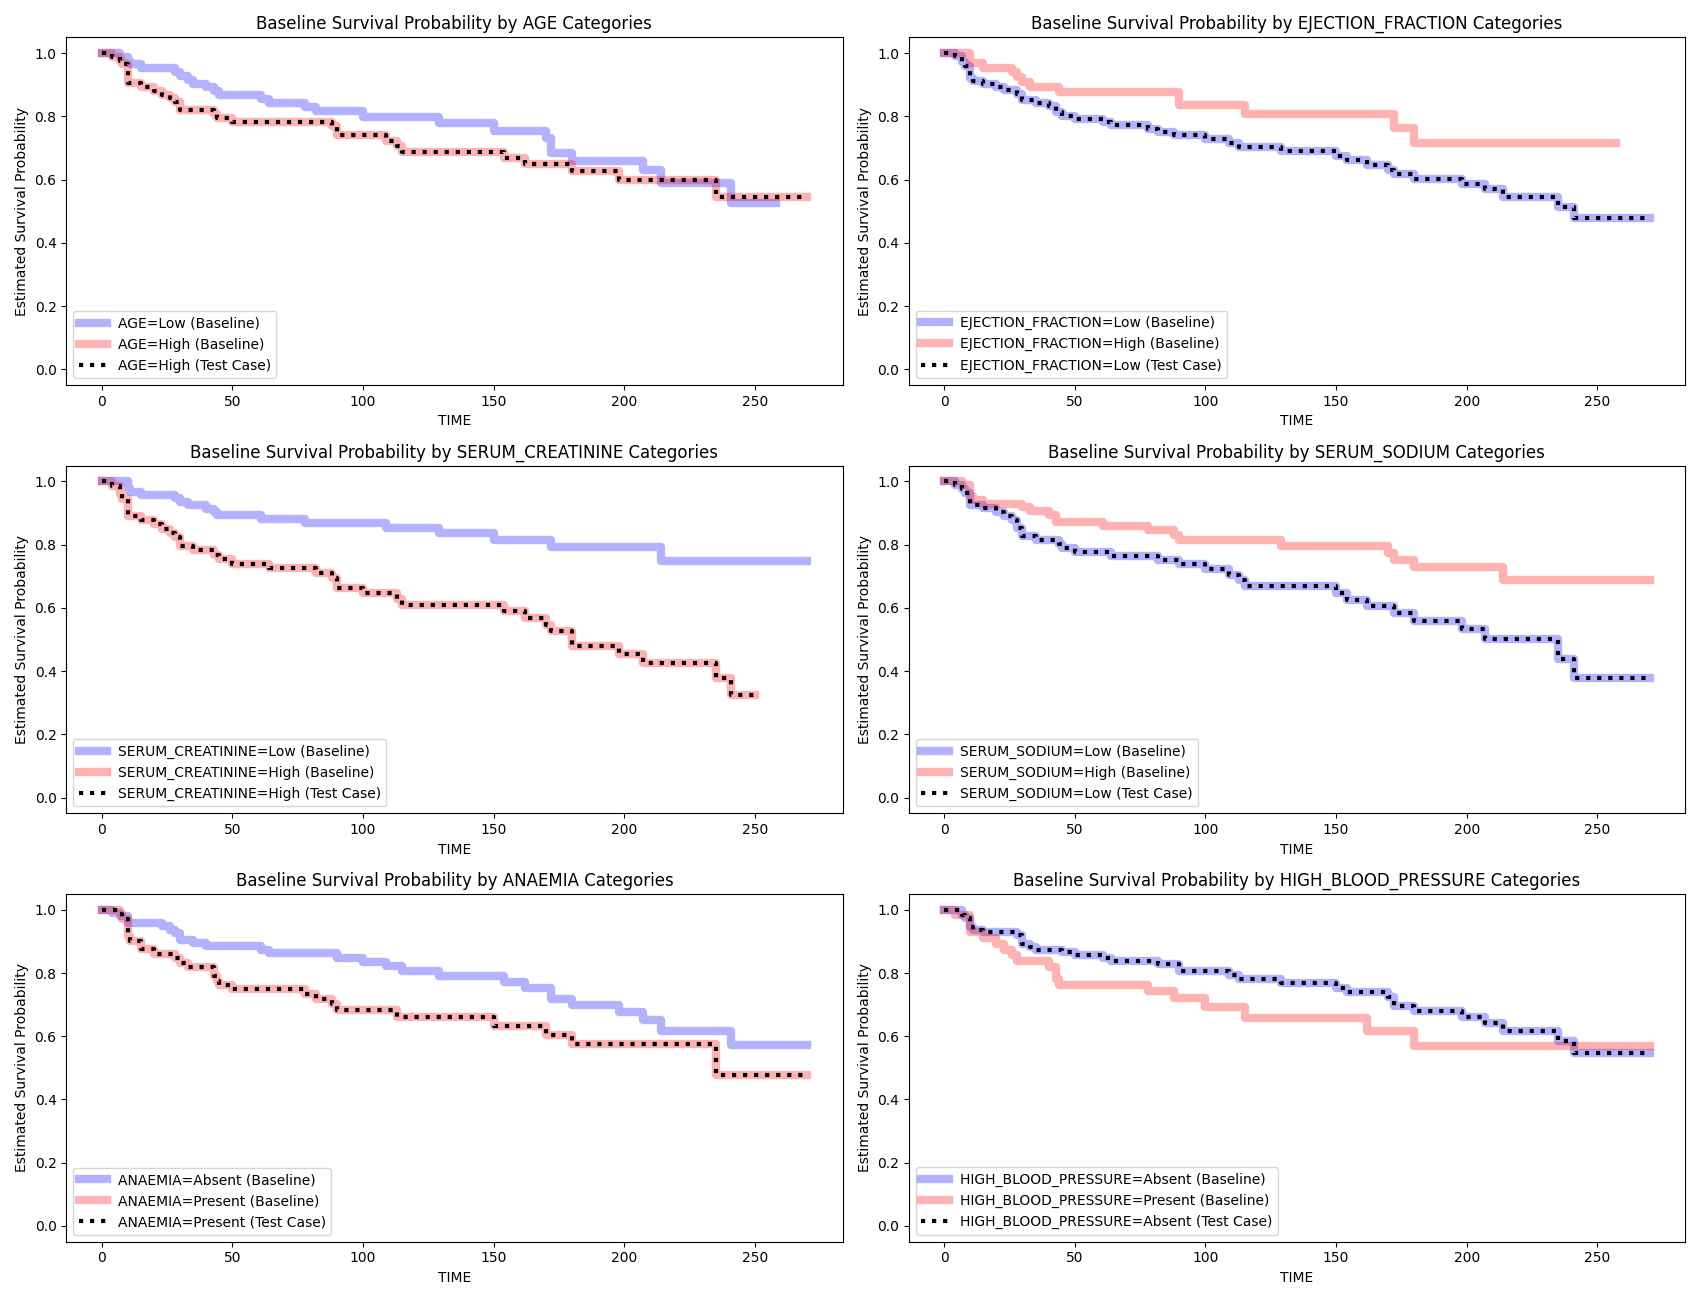

In [14]:
##################################
# Sending a POST endpoint request for
# plotting the estimated survival profiles
# using a Kaplan-Meier Plot Matrix
# for an individual test case
# against the training data as baseline
##################################
response = requests.post(f"{SP_FASTAPI_BASE_URL}/plot-kaplan-meier-grid/", json=test_case_request)
if response.status_code == 200:
    plot_data = response.json()["plot"]
    # Decoding and displaying the plot
    img = base64.b64decode(plot_data)
    with open("kaplan_meier_plot_matrix.png", "wb") as f:
        f.write(img)
        display(Image.open("kaplan_meier_plot_matrix.png"))
else:
    print("Error:", response.status_code, response.text)
    

In [15]:
##################################
# Sending a POST endpoint request for
# generating the heart failure survival profile,
# estimating the heart failure survival probabilities,
# and predicting the risk category
# of an individual test case
##################################
response = requests.post(f"{SP_FASTAPI_BASE_URL}/compute-test-coxph-survival-probability-class/", json=test_case_request)
if response.status_code == 200:
    display("Response:", response.json())
else:
    print("Error:", response.status_code, response.text)
    

'Response:'

{'survival_function': [0.9935852422336905,
  0.980581105741338,
  0.974000615497288,
  0.9335716291520674,
  0.9263704990495979,
  0.9120703170806183,
  0.9120703170806183,
  0.9047761239313578,
  0.9047761239313578,
  0.8974218629392444,
  0.8900072909706268,
  0.8752652317601862,
  0.8530570074516991,
  0.845488798281818,
  0.8379273268795359,
  0.8303847506918888,
  0.8154721703733717,
  0.8079397039318209,
  0.8004184982181605,
  0.7928481866122223,
  0.7928481866122223,
  0.7928481866122223,
  0.7850129580161529,
  0.7772421803304252,
  0.7772421803304252,
  0.7772421803304252,
  0.7772421803304252,
  0.7772421803304252,
  0.7691168179039268,
  0.7691168179039268,
  0.7691168179039268,
  0.7606762112672418,
  0.7606762112672418,
  0.7606762112672418,
  0.7606762112672418,
  0.7516654395309634,
  0.7332315064213829,
  0.7332315064213829,
  0.7332315064213829,
  0.7332315064213829,
  0.72353421335051,
  0.72353421335051,
  0.72353421335051,
  0.72353421335051,
  0.7123287748023364,


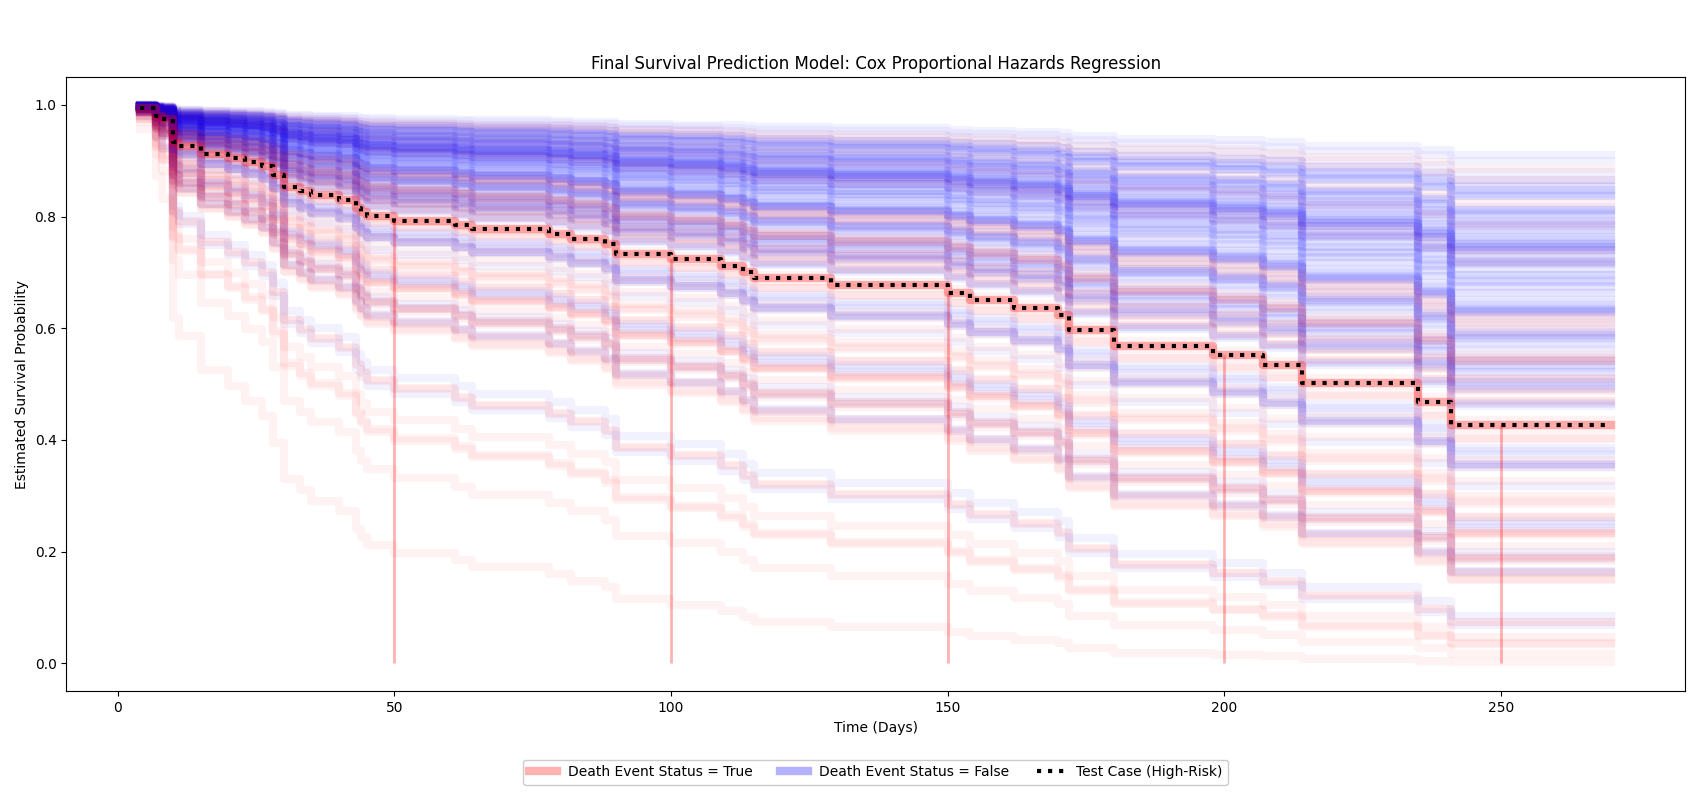

In [16]:
##################################
# Sending a POST endpoint request for
# plotting the estimated survival probability profile
# of the final survival prediction model
# for an individual test case
# against the training data as baseline
##################################
response = requests.post(f"{SP_FASTAPI_BASE_URL}/plot_coxph_survival_profile/", json=test_case_request)
if response.status_code == 200:
    plot_data = response.json()["plot"]
    # Decoding and displaying the plot
    img = base64.b64decode(plot_data)
    with open("coxph_survival_function_plot.png", "wb") as f:
        f.write(img)
        display(Image.open("coxph_survival_function_plot.png"))
else:
    print("Error:", response.status_code, response.text)
    

## 1.3. Application Containerization <a class="anchor" id="1.3"></a>

### 1.3.1 Docker File Creation <a class="anchor" id="1.3.1"></a>

### 1.3.2 Docker Image Building <a class="anchor" id="1.3.2"></a>

### 1.3.3 Docker Image Testing <a class="anchor" id="1.3.3"></a>

## 1.4. Application Programming Interface (API) Deployment <a class="anchor" id="1.4"></a>

### 1.4.1 API Container Hosting <a class="anchor" id="1.4.1"></a>

## 1.5. User Interface (UI) Development <a class="anchor" id="1.5"></a>

### 1.5.1 UI Building With API Calls <a class="anchor" id="1.5.1"></a>

## 1.6. Web Application Deployment <a class="anchor" id="1.6"></a>

### 1.6.1 UI Hosting <a class="anchor" id="1.6.1"></a>

## 1.7. Consolidated Findings <a class="anchor" id="1.7"></a>

# 2. Summary <a class="anchor" id="Summary"></a>

# 3. References <a class="anchor" id="References"></a>
* **[Book]** [Building Machine Learning Powered Applications: Going From Idea to Product](https://www.oreilly.com/library/view/building-machine-learning/9781492045106/) by Emmanuel Ameisen
* **[Book]** [Designing Machine Learning Systems: An Iterative Process for Production-Ready Applications](https://www.oreilly.com/library/view/designing-machine-learning/9781098107956/) by Chip Huyen
* **[Book]** [Machine Learning Bookcamp: Build a Portfolio of Real-Life Projects](https://www.manning.com/books/machine-learning-bookcamp) by Alexey Grigorev and Adam Newmark 
* **[Book]** [Building Machine Learning Pipelines: Automating Model Life Cycles with TensorFlow](https://www.oreilly.com/library/view/building-machine-learning/9781492053187/) by Hannes Hapke and Catherine Nelson
* **[Book]** [Hands-On APIs for AI and Data Science: Python Development with FastAPI](https://handsonapibook.com/index.html) by Ryan Day
* **[Book]** [Managing Machine Learning Projects: From Design to Deployment](https://www.manning.com/books/managing-machine-learning-projects) by Simon Thompson
* **[Book]** [Building Data Science Applications with FastAPI: Develop, Manage, and Deploy Efficient Machine Learning Applications with Python](https://www.oreilly.com/library/view/building-data-science/9781837632749/) by François Voron
* **[Book]** [Microservice APIs: Using Python, Flask, FastAPI, OpenAPI and More](https://www.manning.com/books/microservice-apis) by Jose Haro Peralta
* **[Book]** [Machine Learning Engineering with Python: Manage the Lifecycle of Machine Learning odels using MLOps with Practical Examples](https://www.oreilly.com/library/view/machine-learning-engineering/9781837631964/) by Andrew McMahon
* **[Book]** [Introducing MLOps: How to Scale Machine Learning in the Enterprise](https://www.oreilly.com/library/view/introducing-mlops/9781492083283/) by Mark Treveil, Nicolas Omont, Clément Stenac, Kenji Lefevre, Du Phan, Joachim Zentici, Adrien Lavoillotte, Makoto Miyazaki and Lynn Heidmann
* **[Book]** [Practical Python Backend Programming: Build Flask and FastAPI Applications, Asynchronous Programming, Containerization and Deploy Apps on Cloud](https://leanpub.com/practicalpythonbackendprogramming) by Tim Peters
* **[Python Library API]** [NumPy](https://numpy.org/doc/) by NumPy Team
* **[Python Library API]** [pandas](https://pandas.pydata.org/docs/) by Pandas Team
* **[Python Library API]** [seaborn](https://seaborn.pydata.org/) by Seaborn Team
* **[Python Library API]** [matplotlib.pyplot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html) by MatPlotLib Team
* **[Python Library API]** [matplotlib.image](https://matplotlib.org/stable/api/image_api.html) by MatPlotLib Team
* **[Python Library API]** [matplotlib.offsetbox](https://matplotlib.org/stable/api/offsetbox_api.html) by MatPlotLib Team
* **[Python Library API]** [itertools](https://docs.python.org/3/library/itertools.html) by Python Team
* **[Python Library API]** [operator](https://docs.python.org/3/library/operator.html) by Python Team
* **[Python Library API]** [sklearn.experimental](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.experimental) by Scikit-Learn Team
* **[Python Library API]** [sklearn.impute](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute) by Scikit-Learn Team
* **[Python Library API]** [sklearn.linear_model](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) by Scikit-Learn Team
* **[Python Library API]** [sklearn.preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) by Scikit-Learn Team
* **[Python Library API]** [scipy](https://docs.scipy.org/doc/scipy/) by SciPy Team
* **[Python Library API]** [sklearn.tree](https://scikit-learn.org/stable/modules/tree.html) by Scikit-Learn Team
* **[Python Library API]** [sklearn.ensemble](https://scikit-learn.org/stable/modules/ensemble.html) by Scikit-Learn Team
* **[Python Library API]** [sklearn.svm](https://scikit-learn.org/stable/modules/svm.html) by Scikit-Learn Team
* **[Python Library API]** [sklearn.metrics](https://scikit-learn.org/stable/modules/model_evaluation.html) by Scikit-Learn Team
* **[Python Library API]** [sklearn.model_selection](https://scikit-learn.org/stable/model_selection.html) by Scikit-Learn Team
* **[Python Library API]** [imblearn.over_sampling](https://imbalanced-learn.org/stable/over_sampling.html) by Imbalanced-Learn Team
* **[Python Library API]** [imblearn.under_sampling](https://imbalanced-learn.org/stable/under_sampling.html) by Imbalanced-Learn Team
* **[Python Library API]** [SciKit-Survival](https://pypi.org/project/scikit-survival/) by SciKit-Survival Team
* **[Python Library API]** [SciKit-Learn](https://scikit-learn.org/stable/index.html) by SciKit-Learn Team
* **[Python Library API]** [StatsModels](https://www.statsmodels.org/stable/index.html) by StatsModels Team
* **[Python Library API]** [SciPy](https://scipy.org/) by SciPy Team
* **[Python Library API]** [Lifelines](https://lifelines.readthedocs.io/en/latest/) by Lifelines Team
* **[Python Library API]** [Streamlit](https://streamlit.io/) by Streamlit Team
* **[Python Library API]** [Streamlit Community Cloud](https://streamlit.io/cloud) by Streamlit Team
* **[Article]** [ML - Deploy Machine Learning Models Using FastAPI](https://dorian599.medium.com/ml-deploy-machine-learning-models-using-fastapi-6ab6aef7e777) by Dorian Machado (Medium)
* **[Article]** [Deploying Machine Learning Models Using FastAPI](https://medium.com/@kevinnjagi83/deploying-machine-learning-models-using-fastapi-0389c576d8f1) by Kevin Njagi (Medium)
* **[Article]** [Deploy Machine Learning API with FastAPI for Free](https://lightning.ai/lightning-ai/studios/deploy-machine-learning-api-with-fastapi-for-free?section=featured) by Aniket Maurya (Lightning.AI)
* **[Article]** [How to Use FastAPI for Machine Learning](https://blog.jetbrains.com/pycharm/2024/09/how-to-use-fastapi-for-machine-learning/) by Cheuk Ting Ho (JetBrains.Com)
* **[Article]** [Deploying and Hosting a Machine Learning Model with FastAPI and Heroku](https://testdriven.io/blog/fastapi-machine-learning/) by Michael Herman (TestDriven.IO)
* **[Article]** [A Practical Guide to Deploying Machine Learning Models](https://machinelearningmastery.com/a-practical-guide-to-deploying-machine-learning-models/) by Bala Priya (MachineLearningMastery.Com)
* **[Article]** [Using FastAPI to Deploy Machine Learning Models](https://engineering.rappi.com/using-fastapi-to-deploy-machine-learning-models-cd5ed7219ea) by Carl Handlin (Medium)
* **[Article]** [How to Deploy a Machine Learning Model](https://www.maartengrootendorst.com/blog/deploy/) by Maarten Grootendorst (MaartenGrootendorst.Com)
* **[Article]** [Accelerating Machine Learning Deployment: Unleashing the Power of FastAPI and Docker](https://medium.datadriveninvestor.com/accelerating-machine-learning-deployment-unleashing-the-power-of-fastapi-and-docker-933865cb990a) by Pratyush Khare (Medium)
* **[Article]** [Containerize and Deploy ML Models with FastAPI & Docker](https://towardsdev.com/containerize-and-deploy-ml-models-with-fastapi-docker-d8c19cc8ef94) by Hemachandran Dhinakaran (Medium)
* **[Article]** [Quick Tutorial to Deploy Your ML models using FastAPI and Docker](https://shreyansh26.github.io/post/2020-11-30_fast_api_docker_ml_deploy/) by Shreyansh Singh (GitHub)
* **[Article]** [How to Deploying Machine Learning Models in Production](https://levelup.gitconnected.com/how-to-deploying-machine-learning-models-in-production-3009b90eadfa) by Umair Akram (Medium)
* **[Article]** [Deploying a Machine Learning Model with FastAPI: A Comprehensive Guide](https://ai.plainenglish.io/deploying-a-machine-learning-model-with-fastapi-a-comprehensive-guide-997ac747601d) by Muhammad Naveed Arshad (Medium)
* **[Article]** [Deploy Machine Learning Model with REST API using FastAPI](https://blog.yusufberki.net/deploy-machine-learning-model-with-rest-api-using-fastapi-288f229161b7) by Yusuf Berki Yazıcıoğlu (Medium)
* **[Article]** [Deploying An ML Model With FastAPI — A Succinct Guide](https://towardsdatascience.com/deploying-an-ml-model-with-fastapi-a-succinct-guide-69eceda27b21) by Yash Prakash (Medium)
* **[Article]** [How to Build a Machine Learning App with FastAPI: Dockerize and Deploy the FastAPI Application to Kubernetes](https://dev.to/bravinsimiyu/beginner-guide-on-how-to-build-a-machine-learning-app-with-fastapi-part-ii-deploying-the-fastapi-application-to-kubernetes-4j6g) by Bravin Wasike (Dev.TO)
* **[Article]** [Building a Machine Learning Model API with Flask: A Step-by-Step Guide](https://medium.com/@nileshshindeofficial/building-a-machine-learning-model-api-with-flask-a-step-by-step-guide-6f85e9bb9773) by Nilesh Shinde (Medium)
* **[Article]** [Deploying Your Machine Learning Model as a REST API Using Flask](https://medium.com/analytics-vidhya/deploying-your-machine-learning-model-as-a-rest-api-using-flask-c2e6a0b574f5) by Emmanuel Oludare (Medium)
* **[Article]** [Machine Learning Model Deployment on Heroku Using Flask](https://towardsdatascience.com/machine-learning-model-deployment-on-heroku-using-flask-467acb4a34da) by Charu Makhijani (Medium)
* **[Article]** [Model Deployment using Flask](https://towardsdatascience.com/model-deployment-using-flask-c5dcbb6499c9) by Ravindra Sharma (Medium)
* **[Article]** [Deploy a Machine Learning Model using Flask: Step-By-Step](https://codefather.tech/blog/deploy-machine-learning-model-flask/) by Claudio Sabato (CodeFather.Tech)
* **[Article]** [How to Deploy a Machine Learning Model using Flask?](https://datadance.ai/machine-learning/how-to-deploy-a-machine-learning-model-using-flask/) by DataDance.AI Team (DataDance.AI)
* **[Article]** [A Comprehensive Guide on Deploying Machine Learning Models with Flask](https://machinelearningmodels.org/a-comprehensive-guide-on-deploying-machine-learning-models-with-flask/) by MachineLearningModels.Org Team (MachineLearningModels.Org)
* **[Article]** [How to Deploy Machine Learning Models with Flask and Docker](https://python.plainenglish.io/how-to-deploy-machine-learning-models-with-flask-and-docker-3c4d6116e809) by Usama Malik (Medium)
* **[Article]** [Deploying Machine Learning Models with Flask: A Step-by-Step Guide](https://medium.com/@sukmahanifah/deploying-machine-learning-models-with-flask-a-step-by-step-guide-cd22967c1f66) by Sukma Hanifa (Medium)
* **[Article]** [Machine Learning Model Deployment on Heroku Using Flask](https://towardsdatascience.com/machine-learning-model-deployment-on-heroku-using-flask-467acb4a34da) by Charu Makhijani (Medium)
* **[Article]** [Complete Guide on Model Deployment with Flask and Heroku](https://towardsdatascience.com/complete-guide-on-model-deployment-with-flask-and-heroku-98c87554a6b9) by Tarek Ghanoum (Medium)
* **[Article]** [Turning Machine Learning Models into APIs in Python](https://www.datacamp.com/tutorial/machine-learning-models-api-python) by Sayak Paul (DataCamp)
* **[Article]** [Machine Learning, Pipelines, Deployment and MLOps Tutorial](https://www.datacamp.com/tutorial/tutorial-machine-learning-pipelines-mlops-deployment) by Moez Ali (DataCamp)
* **[Article]** [Docker vs. Podman: Which Containerization Tool is Right for You](https://www.datacamp.com/blog/docker-vs-podman) by Jake Roach (DataCamp)
* **[Article]** [Introduction to Podman for Machine Learning: Streamlining MLOps Workflows](https://geekflare.com/devops/podman-vs-docker/) by Abid Ali Awan (DataCamp)
* **[Article]** [Podman vs Docker: Which One to Choose?](https://www.datacamp.com/tutorial/tutorial-machine-learning-pipelines-mlops-deployment) by Talha Khalid (GeekFlare)
* **[Article]** [Docker Vs Podman : Which One to Choose?](https://blog.fourninecloud.com/docker-vs-podman-which-one-to-choose-b6387bd29db3) by Saiteja Bellam (Medium)
* **[Article]** [Podman vs Docker: What Are the Key Differences Explained in Detail](https://www.geeksforgeeks.org/podman-vs-docker/) by Geeks For Geeks Team (GeeksForGeeks.Com)
* **[Video Tutorial]** [Machine Learning Models Deployment with Flask and Docker](https://www.youtube.com/watch?v=KTd2a1QKlwo) by Data Science Dojo (YouTube)
* **[Video Tutorial]** [Deploy Machine Learning Model Flask](https://www.youtube.com/watch?v=MxJnR1DMmsY) by Stats Wire (YouTube)
* **[Video Tutorial]** [Deploy Machine Learning Models with Flask | Using Render to host API and Get URL :Step-By-Step Guide](https://www.youtube.com/watch?v=LBlvuUaIg58) by Prachet Shah (YouTube)
* **[Video Tutorial]** [Deploy Machine Learning Model using Flask](https://www.youtube.com/watch?app=desktop&v=UbCWoMf80PY&t=597s) by Krish Naik (YouTube)
* **[Video Tutorial]** [Deploy Your ML Model Using Flask Framework](https://www.youtube.com/watch?v=PtyyVGsE-u0) by MSFTImagine (YouTube)
* **[Video Tutorial]** [Build a Machine Learning App From Scratch with Flask & Docker](https://www.youtube.com/watch?v=S--SD4QbGps) by Patrick Loeber (YouTube)
* **[Video Tutorial]** [Deploying a Machine Learning Model to a Web with Flask and Python Anywhere](https://www.youtube.com/watch?v=3w3vBu2WMvk) by Prof. Phd. Manoel Gadi (YouTube)
* **[Video Tutorial]** [End To End Machine Learning Project With Deployment Using Flask](https://www.youtube.com/watch?v=RnOU2bumBPE) by Data Science Diaries (YouTube)
* **[Video Tutorial]** [Publish ML Model as API or Web with Python Flask](https://www.youtube.com/watch?v=_cLbGKKrggs) by Python ML Daily (YouTube)
* **[Video Tutorial]** [Deploy a Machine Learning Model using Flask API to Heroku](https://www.youtube.com/watch?v=Q_Z5kzKpofk) by Jackson Yuan (YouTube)
* **[Video Tutorial]** [Deploying Machine Learning Model with FlaskAPI - CI/CD for ML Series](https://www.youtube.com/watch?v=vxF5uEoL1C4) by Anthony Soronnadi (YouTube)
* **[Video Tutorial]** [Deploy ML model as Webservice | ML model deployment | Machine Learning | Data Magic](https://www.youtube.com/watch?v=3U1T8cLL-1M) by Data Magic (YouTube)
* **[Video Tutorial]** [Deploying Machine Learning Model Using Flask](https://www.youtube.com/watch?v=ng15EVDrL28) by DataMites (YouTube)
* **[Video Tutorial]** [ML Model Deployment With Flask On Heroku | How To Deploy Machine Learning Model With Flask | Edureka](https://www.youtube.com/watch?v=pMIwu5FwJ78) by Edureka (YouTube)
* **[Video Tutorial]** [ML Model Deployment with Flask | Machine Learning & Data Science](https://www.youtube.com/watch?v=Od0gS3Qeges) by Dan Bochman (YouTube)
* **[Video Tutorial]** [How to Deploy ML Solutions with FastAPI, Docker, & AWS](https://www.youtube.com/watch?v=pJ_nCklQ65w) by Shaw Talebi (YouTube)
* **[Video Tutorial]** [Deploy ML models with FastAPI, Docker, and Heroku | Tutorial](https://www.youtube.com/watch?v=h5wLuVDr0oc) by AssemblyAI (YouTube)
* **[Video Tutorial]** [Machine Learning Model Deployment Using FastAPI](https://www.youtube.com/watch?v=0s-oat69UqU) by TheOyinbooke (YouTube)
* **[Video Tutorial]** [Creating APIs For Machine Learning Models with FastAPI](https://www.youtube.com/watch?v=5PgqzVG9SCk) by NeuralNine (YouTube)
* **[Video Tutorial]** [How To Deploy Machine Learning Models Using FastAPI-Deployment Of ML Models As API’s](https://www.youtube.com/watch?v=b5F667g1yCk) by Krish Naik (YouTube)
* **[Video Tutorial]** [Machine Learning Model with FastAPI, Streamlit and Docker](https://www.youtube.com/watch?v=cCsnmxXxWaM) by CodeTricks (YouTube)
* **[Video Tutorial]** [FastAPI Machine Learning Model Deployment | Python | FastAPI](https://www.youtube.com/watch?v=DUhzTi3w5KA) by Stats Wire (YouTube)
* **[Video Tutorial]** [Deploying Machine Learning Models - Full Guide](https://www.youtube.com/watch?v=oyYur3uVl4w) by NeuralNine (YouTube)
* **[Video Tutorial]** [Model Deployment FAST API - Docker | Machine Learning Model Deployment pipeline | FastAPI VS Flask](https://www.youtube.com/watch?v=YvvOuY9L_Yw) by 360DigiTMG (YouTube)
* **[Video Tutorial]** [Build an AI app with FastAPI and Docker - Coding Tutorial with Tips](https://www.youtube.com/watch?v=iqrS7Q174Ac) by Patrick Loeber (YouTube)
* **[Video Tutorial]** [Create a Deep Learning API with Python and FastAPI](https://www.youtube.com/watch?v=NrarIs9n24I) by DataQuest (YouTube)
* **[Video Tutorial]** [Fast API Machine Learning Web App Tutorial + Deployment on Heroku](https://www.youtube.com/watch?v=LSXU3dEDg9A) by Greg Hogg (YouTube)
* **[Course]** [Deeplearning.AI Machine Learning in Production](https://www.coursera.org/learn/introduction-to-machine-learning-in-production) by DeepLearning.AI Team (Coursera)
* **[Course]** [IBM AI Workflow: Enterprise Model Deployment](https://www.coursera.org/learn/ibm-ai-workflow-machine-learning-model-deployment) by IBM Team (Coursera)
* **[Course]** [DataCamp Machine Learning Engineer Track](https://app.datacamp.com/learn/career-tracks/machine-learning-engineer) by DataCamp Team (DataCamp)
* **[Course]** [DataCamp Designing Machine Learning Workflows in Python](https://app.datacamp.com/learn/courses/designing-machine-learning-workflows-in-python) by DataCamp Team (DataCamp)
* **[Course]** [DataCamp Building APIs in Python](https://app.datacamp.com/learn/skill-tracks/building-apis-in-python) by DataCamp Team (DataCamp)

In [17]:
from IPython.display import display, HTML
display(HTML("<style>.rendered_html { font-size: 15px; font-family: 'Trebuchet MS'; }</style>"))